In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-full.csv', sep=';')

### no null values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [162]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### all except 4 of the poutcome == 'unknown' correlate to the contacts that were not previously contacted in the previous campaign. 'other' is vague.

###### . will drop the column evetually after analysis

In [4]:
df.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [164]:
df.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [5]:
df[(df['poutcome'] == 'unknown') & (df['previous'] == 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [166]:
df[(df['poutcome'] == 'unknown') & (df['pdays'] == -1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


#### here are the remaining 5

In [167]:
df[(df['poutcome'] == 'unknown') & (df['previous'] != 0)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40658,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes
41821,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,no
42042,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes
43978,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,no
45021,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,no


In [6]:
df[(df['poutcome'] == 'unknown') & (df['pdays'] != -1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
40658,61,retired,married,tertiary,no,3140,yes,yes,cellular,6,aug,975,4,98,1,unknown,yes
41821,39,management,married,tertiary,no,184,no,no,cellular,15,oct,206,1,168,5,unknown,no
42042,26,admin.,single,secondary,no,338,no,no,cellular,29,oct,209,1,188,2,unknown,yes
43978,30,technician,single,secondary,no,254,yes,yes,cellular,24,jun,167,3,416,2,unknown,no
45021,37,management,married,secondary,no,209,no,no,cellular,14,oct,183,3,528,7,unknown,no


#### the longer the duration, the more likely the client subscribes. Could this be due to the saying that "the longer the copy, the more likely a sale is made" and longer copy allows you to get into the head of a client. "the longer you speak, the more rapport you can build with the client. and it is always advised to delay your pitch until you know the clients doubts have been cleared. how to win friends and influence people"

In [7]:
df.sort_values('duration')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
22937,35,technician,married,secondary,no,5535,no,no,cellular,26,aug,0,15,-1,0,unknown,no
6424,53,management,married,primary,no,351,yes,no,unknown,27,may,0,4,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,162,yes,yes,cellular,11,may,0,2,-1,0,unknown,no
31740,39,technician,divorced,secondary,no,17441,yes,yes,cellular,7,apr,1,1,-1,0,unknown,no
44758,28,admin.,married,secondary,no,1595,no,no,unknown,9,sep,1,1,254,4,success,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,45,blue-collar,married,secondary,no,66,yes,no,unknown,13,may,3366,3,-1,0,unknown,no
19639,37,blue-collar,married,tertiary,no,359,no,yes,cellular,7,aug,3422,2,-1,0,unknown,no
44602,45,services,single,secondary,no,955,no,no,unknown,27,aug,3785,1,-1,0,unknown,no
9947,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes


### people with bank balance greater than zero were more than twice more likely to subscribe

In [8]:
df[df['balance']>0].y.value_counts()

no     33144
yes     4787
Name: y, dtype: int64

In [15]:
4787/33144

0.14443036447019067

In [9]:
df[df['balance']<0].y.value_counts()

no     3556
yes     210
Name: y, dtype: int64

In [17]:
210/3556

0.05905511811023622

In [10]:
g = df.y.value_counts(normalize=True)*100

plt.figure(figsize=(8, 6))
# colors = {'<=50K': 'green', '>50K': 'red'}
# color_list = [colors[label] for label in g['income']]

ax = g.plot(kind='bar')

# add the legend with increased font size and repositioned
# ax.legend(labels=g['income'].unique(), title='Target', fontsize=12, loc='upper right')

# set the figure size using set_size_inches method
plt.ylabel("proportion(%)")
plt.xlabel("subscribed?")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
plt.title('Class Distribution in Bank Marketing Dataset', fontsize=14)
plt.xticks([0, 1], ['no', 'yes'], rotation=0)
plt.savefig('Bank mark distribution.png', bbox_inches='tight')

plt.show()

NameError: name 'plt' is not defined

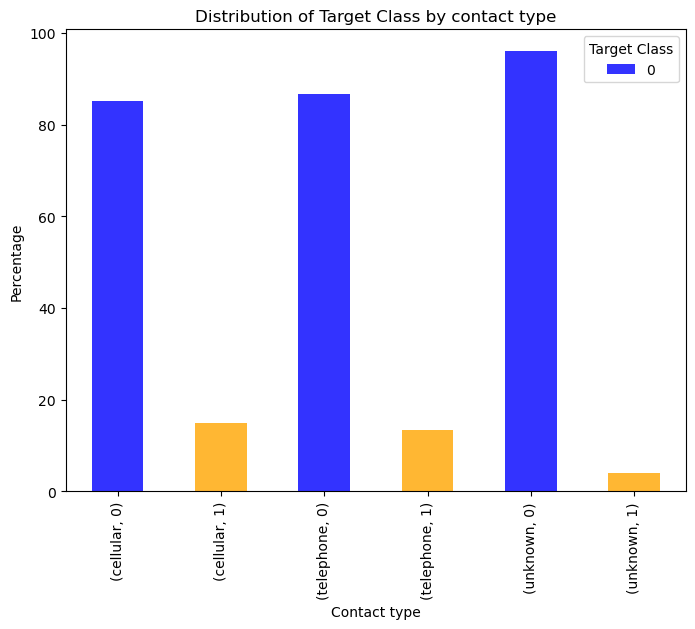

In [151]:
distribution = df.groupby('contact')['y'].value_counts(normalize =True)*100

ax = distribution.plot(kind='bar', color=['blue', 'orange'], alpha=0.8, figsize=(8, 6))
ax.set_xlabel('Contact type')
ax.set_ylabel('Percentage')
ax.set_title('Distribution of Target Class by contact type')
ax.legend(('0', '1'), title='Target Class')

plt.show()

In [11]:
df['y'] = df['y'].replace({'yes':1, 'no': 0})
df['housing'] = df['housing'].replace({'yes':1, 'no': 0})
df['loan'] = df['loan'].replace({'yes':1, 'no': 0})
df['default'] = df['default'].replace({'yes':1, 'no': 0})

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

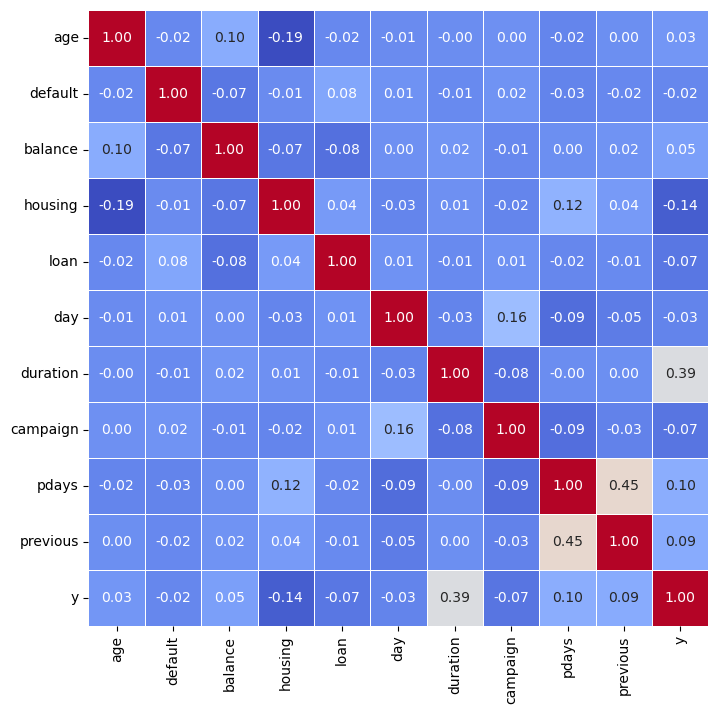

In [18]:
corr = df.corr()

# plot the correlation matrix using heatmap
# sns.heatmap(corr, annot=True, cmap='coolwarm')

ax = sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', cbar=False, linewidths=.5)

# Set the size of the plot to 10x10 inches
ax.figure.set_size_inches(8, 8)

# show the plot
plt.show()



In [20]:
subDf = df.drop('poutcome', axis =1)
# subDf['y'] = subDf['y'].replace({'yes':1, 'no': 0})
allK = subDf[(subDf != 'unknown').all(axis=1)]

allK

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
12657,27,management,single,secondary,0,35,0,0,cellular,4,jul,255,1,-1,0,0
12658,54,blue-collar,married,primary,0,466,0,0,cellular,4,jul,297,1,-1,0,0
12659,43,blue-collar,married,secondary,0,105,0,1,cellular,4,jul,668,2,-1,0,0
12660,31,technician,single,secondary,0,19,0,0,telephone,4,jul,65,2,-1,0,0
12661,27,technician,single,secondary,0,126,1,1,cellular,4,jul,436,4,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,0


In [21]:
# all categorical variables
catV = [col for col in allK.columns if allK[col].dtype == "object"]

In [22]:
dummyDf = pd.get_dummies(allK, columns=catV)

In [23]:
dummyDf.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
12657,27,0,35,0,0,4,255,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
12658,54,0,466,0,0,4,297,1,-1,0,...,0,0,0,1,0,0,0,0,0,0
12659,43,0,105,0,1,4,668,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
12660,31,0,19,0,0,4,65,2,-1,0,...,0,0,0,1,0,0,0,0,0,0
12661,27,0,126,1,1,4,436,4,-1,0,...,0,0,0,1,0,0,0,0,0,0


# unsurprisingly, the duration has the strongest correlation of all the variables. but it can't be used in prediction.

whether a person has hosing loan is the next biggest linearly correlated albeit weak.

In [24]:
corr_matrix = dummyDf.corr()

y_corr = corr_matrix[['y']].drop('y', axis=0).sort_values('y', ascending=False)

y_corr.head()

,y
duration,0.395379
month_mar,0.133352
month_sep,0.130642
month_jun,0.124888
month_oct,0.120301


In [25]:
corr_matrix[((corr_matrix.abs() > 0.5)&(corr_matrix.abs() < 1)) .any(axis=1)].sort_values('campaign')

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
contact_cellular,-0.182891,0.018417,-0.036870,0.052161,0.012737,-0.020067,0.030756,-0.065651,0.025610,-0.003600,...,-0.022814,-0.014815,0.003473,-0.068112,-0.002595,-0.005378,0.014455,-0.011289,-0.049896,-0.012388
marital_single,-0.440461,0.004967,-0.014354,-0.036520,-0.056997,-0.012764,0.019498,-0.036379,0.024803,0.014339,...,0.003043,0.034897,0.042491,-0.057689,0.039020,0.021034,0.061905,-0.046219,0.010626,0.012741
education_secondary,-0.066032,0.011648,-0.071289,0.088481,0.065279,-0.014459,-0.000709,-0.016396,0.043854,-0.000409,...,-0.002448,0.003576,0.006168,0.038037,-0.026433,-0.027493,0.066828,-0.016689,-0.019266,-0.028928
education_tertiary,-0.093514,-0.016351,0.085747,-0.097851,-0.068096,0.020524,-0.006161,0.013535,-0.050459,0.003268,...,0.006139,-0.000899,0.000786,-0.065520,0.047729,0.037419,-0.095922,0.032737,0.020992,0.030583
job_management,-0.039189,0.001232,0.067323,-0.058166,-0.047289,0.016681,-0.012278,0.021722,-0.040605,0.003699,...,0.001229,-0.018505,-0.012618,-0.041731,0.022132,0.022082,-0.074060,0.036934,0.003073,0.022140
marital_married,0.298860,-0.015144,0.025993,0.028762,0.038886,0.007985,-0.022682,0.043889,-0.026843,-0.011720,...,-0.001778,-0.034806,-0.043326,0.038895,-0.030477,-0.017361,-0.062778,0.033513,-0.007748,-0.008560
contact_telephone,0.182891,-0.018417,0.036870,-0.052161,-0.012737,0.020067,-0.030756,0.065651,-0.025610,0.003600,...,0.022814,0.014815,-0.003473,0.068112,0.002595,0.005378,-0.014455,0.011289,0.049896,0.012388


In [ ]:
# xxx = []
# for i in corr_matrix.columns:
#     for j in corr_matrix.columns:
#         if (abs(corr_matrix.loc[i,j])>0.4) and (abs(corr_matrix.loc[i,j])<0.5):
#             xxx.append((i,j))


In [ ]:
# ax = sns.heatmap(y_corr[y_corr['y'].abs()>0.1], cmap='coolwarm', annot=False, square=True,
#             xticklabels=y_corr[y_corr['y'].abs()>0.1].columns,
#             yticklabels=y_corr[y_corr['y'].abs()>0.1].columns[::-1])

# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
# plt.show()

In [26]:
# # %% time
corr_matrix = dummyDf.corr()

# # plot the heatmap

# sns.set(rc={'figure.figsize':(10,8)})
# sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, square=True)


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# create a sample dataset
# data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# # plot the distribution of the dataset
# sns.distplot(subDf['balance'], kde=False)

# # show the plot
# plt.show()
#

In [31]:
allK['education'] = allK['education'].replace({'tertiary':2, 'secondary': 1, 'primary':0})
allK.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y
12657,27,management,single,1,0,35,0,0,cellular,4,jul,255,1,-1,0,0
12658,54,blue-collar,married,0,0,466,0,0,cellular,4,jul,297,1,-1,0,0
12659,43,blue-collar,married,1,0,105,0,1,cellular,4,jul,668,2,-1,0,0
12660,31,technician,single,1,0,19,0,0,telephone,4,jul,65,2,-1,0,0
12661,27,technician,single,1,0,126,1,1,cellular,4,jul,436,4,-1,0,0


# column transformer

In [32]:
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
ct = make_column_transformer(
    (StandardScaler(),['age', 'balance','campaign', 'pdays', 'previous']),
    (OneHotEncoder(sparse=False), ['job','marital','contact','month']),
    (MinMaxScaler(), ['education']))

###### dropping day because by itself it doesn't seem to contribute anything significant. 

###### in a case where the marketing team works only on week days, the 31st could be a weekend in 6 months but a weekday in 1 other which makes it less likely for a sale to be made on that day. Also days 30-31 doesn't appear as much as days 1-28.

##### although, useful bins can be created with it like "start of the month", "middle of the month" and "end of the month". It may show that people are more willing to subscribe when their salaries just came in.

###### also if the year is known, the day of the week (ie: Monday, Tuesday) could be used instead.

In [33]:
data_features = allK.drop(["y", 'duration', 'day'], axis=1)
# split dataframe and income
X_train, X_test, y_train, y_test = train_test_split(
    data_features, allK.y, random_state=26, stratify = allK.y)

In [34]:
ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(23180, 34)


In [35]:
X_test_trans = ct.transform(X_test)

##### evident case of underfitting?

In [37]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold


In [38]:
from sklearn.model_selection import cross_val_score, cross_validate

In [39]:
from sklearn import model_selection

In [111]:
# from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# scoring = {'accuracy' : make_scorer(accuracy_score), 
#            'precision' : make_scorer(precision_score),
#            'recall' : make_scorer(recall_score), 
#            'f1_score' : make_scorer(f1_score)}

# # from sklearn.model_selection import ParameterGrid, StratifiedKFold
# # scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),
# #                    StratifiedKFold(5), SVC, ParameterGrid(param_grid))
# # print("Cross-validation scores: {}".format(scores))

# # kfold = model_selection.KFold(n_splits=10, shuffle= True,random_state=42)
# strakfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=26)

# model=DecisionTreeClassifier(max_depth=4,random_state=26)

# results = cross_validate(estimator=model,
#                                           X=X_test_trans,
#                                           y=y_test,
#                                           cv=kfold,
#                                           scoring=scoring)

In [94]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import f1_score, make_scorer
# from sklearn.tree import DecisionTreeClassifier

# # Create a parameter grid to search over
# param_grid = {
    
#     'max_depth': [None] + [i for i in range(5,50,5)]
# }

# # Define a custom scorer based on f1-score
# scorer = make_scorer(f1_score)

# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=26)

# # Create a GridSearchCV object and fit it to the data
# clf = DecisionTreeClassifier(random_state=26)
# grid_search = GridSearchCV(clf, param_grid, scoring=scorer, cv=cv)
# grid_search.fit(X_train_trans, y_train)

# # Get the best estimator and its corresponding f1-score on the test data
# best_clf_tree = grid_search.best_estimator_
# y_pred_tree = best_clf.predict(X_test_trans)
# f1 = f1_score(y_test, y_pred_tree)

In [96]:
# best_clf_tree

DecisionTreeClassifier(max_depth=25, random_state=26)

In [95]:
# f1

0.3545317976965448

In [40]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [41]:
# cm_tree = confusion_matrix(y_test, y_pred_tree)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree,display_labels=["no", "yes"])

# disp.plot()
# plt.title('Confusion Matrix for Decision Tree (max_depth = 10)', fontsize=9)
# # plt.savefig('decision tree confusion matrix.png', bbox_inches='tight')
# plt.show()

In [42]:
from sklearn.metrics import precision_recall_curve
import numpy as np

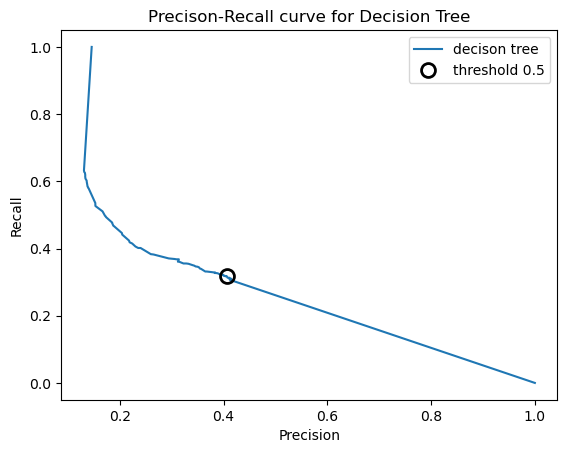

In [99]:
# precision_tree, recall_tree, thresholds_tree = precision_recall_curve(
#     y_test, best_clf_tree.predict_proba(X_test_trans)[:, 1])

# plt.plot(precision_tree, recall_tree, label="decison tree")
# close_default_tree = np.argmin(np.abs(thresholds_tree - 0.5))
# plt.plot(precision_tree[close_default_tree], recall_tree[close_default_tree], 'o', c='k',
#          markersize=10, label="threshold 0.5", fillstyle="none", mew=2)
# plt.xlabel("Precision")
# plt.ylabel("Recall")
# plt.legend(loc="best")
# plt.title("Precison-Recall curve for Decision Tree")
# # plt.savefig('first dt precision recall curve attained.png', bbox_inches='tight')
# plt.show()

In [43]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
# from sklearn.model_selection import StratifiedKFold

# # assume your model is already defined as 'model'
# # assume your data is already split into 'X' and 'y'

# # define the cross-validation strategy
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# # define the performance metrics to use
# scoring = {
#   'f1': make_scorer(f1_score),
#   'precision': make_scorer(precision_score),
#   'recall': make_scorer(recall_score)
# }

# # calculate the performance metrics using cross-validation
# scores = cross_validate(model, data_features, allK.y, cv=cv, scoring=scoring)

# # print the average scores across all folds
# print("F1-score:", scores['test_f1'].mean())
# print("Precision:", scores['test_precision'].mean())
# print("Recall:", scores['test_recall'].mean())

In [44]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [32]:
# from sklearn.tree import DecisionTreeClassifier


# clf_tree = DecisionTreeClassifier(max_depth=7,random_state=26)
# clf_tree.fit(X_train, y_train)
# pred_tree = clf_tree.predict(X_test)
# cm_tree = confusion_matrix(y_test, pred_tree)



# print("Confusion matrix:\n{}\n".format(cm_tree))

# print("f1 score : {:.2f}".format(
#     f1_score(y_test, pred_tree)))
# print(classification_report(y_test, pred_tree))

Confusion matrix:
[[6312  287]
 [ 672  456]]

f1 score : 0.49
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      6599
           1       0.61      0.40      0.49      1128

    accuracy                           0.88      7727
   macro avg       0.76      0.68      0.71      7727
weighted avg       0.86      0.88      0.86      7727



In [45]:
import numpy as np

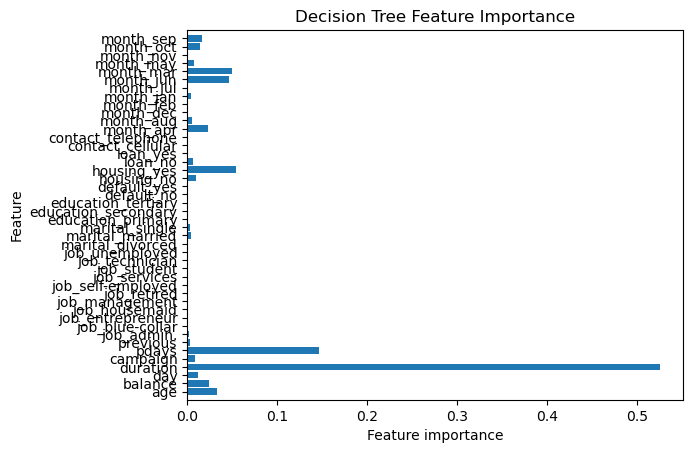

In [33]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.title("Decision Tree Feature Importance")
#     plt.savefig("Decision Tree Feature Importance.png", bbox_inches='tight')
    plt.show()

plot_feature_importances(clf_tree)

In [127]:
from sklearn.neighbors import KNeighborsClassifier

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

pred_knn = clf_knn.predict(X_test)
cm_knn = confusion_matrix(y_test, pred_knn)
print("Confusion matrix:\n{}\n".format(cm_knn))

print(classification_report(y_test, pred_knn,
                            target_names=["genuine", "fraudulent"]))

Confusion matrix:
[[6194  405]
 [ 766  362]]

              precision    recall  f1-score   support

     genuine       0.89      0.94      0.91      6599
  fraudulent       0.47      0.32      0.38      1128

    accuracy                           0.85      7727
   macro avg       0.68      0.63      0.65      7727
weighted avg       0.83      0.85      0.84      7727



C:\Users\adeda\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# SVM

In [153]:
%%time

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import f1_score
# from sklearn.datasets import load_iris

# # Load the iris dataset
# iris = load_iris()
# X, y = iris.data, iris.target

# Define the SVM model
svm_model = SVC()

# Define the parameter grid to search over
param_grid = {'kernel': ['linear']}

# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=26)

# Define the GridSearchCV object with F1-score as the scoring metric
grid_search = GridSearchCV(svm_model, param_grid, scoring='f1', cv=cv)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_trans, y_train)

# Print the best parameters and F1-score
print('Best parameters:', grid_search.best_params_)
print('Best F1-score:', grid_search.best_score_)

Best parameters: {'kernel': 'linear'}
Best F1-score: 0.17623884754997754
Wall time: 1min 25s


In [41]:
# %%time
# from sklearn.svm import SVC

# svc = SVC(kernel = 'linear').fit(X_train, y_train)

# print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6599
           1       0.50      0.00      0.00      1128

    accuracy                           0.85      7727
   macro avg       0.68      0.50      0.46      7727
weighted avg       0.80      0.85      0.79      7727

Wall time: 11min


# XGBoost

In [47]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost as xgb

# load data
# data = pd.read_csv('data.csv')
# X = data.drop('target', axis=1)
# y = data['target']

# split data into train and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define parameter grid for XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
}

# initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=26)

# initialize grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='f1', cv=cv)

# fit the grid search to the training data
grid_search.fit(X_train_trans, y_train)

# print the best parameters and F1-score
print('Best parameters: ', grid_search.best_params_)
print('Best F1-score: {:.2f}'.format(grid_search.best_score_))

# evaluate the best model on the test data
best_model_xgb = grid_search.best_estimator_
y_pred_xgb = best_model_xgb.predict(X_test_trans)
f1_score = f1_score(y_test, y_pred_xgb)
print('Test F1-score: {:.2f}'.format(f1_score))

Best parameters:  {'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200}
Best F1-score: 0.33
Test F1-score: 0.34


In [155]:
f1_score(y_test, y_pred_xgb)

0.3405754550792719

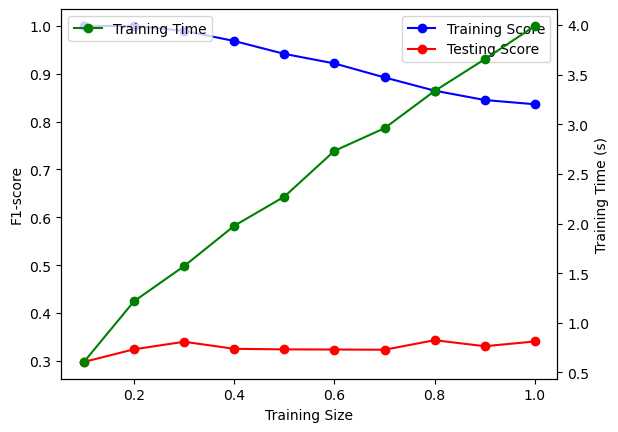

In [156]:
import time
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
# Generate some random data
# X, y = make_classification(n_samples=10000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define a list of training sizes to use for the learning curve
train_sizes = np.linspace(0.1, 1.0, num=10)

# Initialize lists to store the error rates and training times/iterations for each training size
train_error = []
test_error = []
train_time = []

# Train the XGBoost classifier for each training size
for size in train_sizes:
    # Determine the number of samples to use for training
    n_train = int(size * len(X_train_trans))
    # Select a random subset of the training data
    idx = np.random.choice(len(X_train_trans), n_train, replace=False)
    X_train_subset = X_train_trans[idx]
    y_train_subset = np.array(y_train)[idx]

    # Train the XGBoost classifier and record the training time
    start_time = time.time()
    clf = XGBClassifier(objective='binary:logistic', random_state=42, learning_rate= 0.5, max_depth= 7, n_estimators= 200)
    clf.fit(X_train_subset, y_train_subset)
    end_time = time.time()
    train_time.append(end_time - start_time)

    y_train_pred = clf.predict(X_train_subset)
    y_test_pred = clf.predict(X_test_trans)
    f1 = f1_score(y_train_subset, y_train_pred)
    train_error.append(f1)
    f1 = f1_score(y_test, y_test_pred)
    test_error.append(f1)

# Plot the learning curve and training time/iteration curve
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(train_sizes, train_error, 'bo-', label='Training Score')
ax1.plot(train_sizes, test_error, 'ro-', label='Testing Score')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('F1-score')
ax1.legend(loc='upper right')

ax2.plot(train_sizes, train_time, 'go-', label='Training Time')
ax2.set_ylabel('Training Time (s)')
ax2.legend(loc='upper left')

plt.show()

In [ ]:
# pred_xgb = clf_xgb.predict(X_test)
# cm_xgb = confusion_matrix(y_test, pred_xgb, labels=[0, 1])

# print(classification_report(y_test, pred_xgb,
#                             target_names=["genuine", "fraudulent"]))

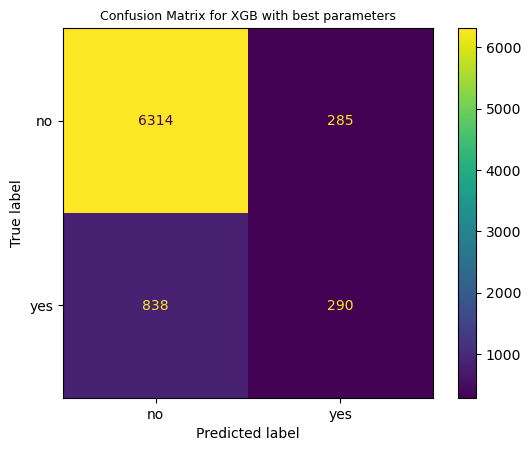

In [141]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb,display_labels=["no", "yes"])

disp.plot()
plt.title('Confusion Matrix for XGB with best parameters', fontsize=9)
# plt.savefig('decision tree confusion matrix.png', bbox_inches='tight')
plt.show()

# Neural Network

In [147]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Define the parameter grid to search over
# param_grid = {
#     'hidden_layer_sizes': [(50,)],
#     'activation': ['relu'],
#     'alpha': [0.0001, 0.001]
# }

# Define the classifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)

# Create the GridSearchCV object
# grid_search = GridSearchCV(clf_mlp, param_grid, cv=5, n_jobs=-1, scoring='f1')

# # Fit the grid search to the data
# grid_search.fit(X_train_trans, y_train)

# # Print the best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best F1-score:", grid_search.best_score_)

clf.fit(X_train_trans, y_train)

# Predict the class labels for the testing data
y_pred_nn = clf.predict(X_test_trans)

# Compute the accuracy score of the classifier on the testing data
print(classification_report(y_test, y_pred_nn,
                            target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.87      0.97      0.92      6599
         yes       0.49      0.19      0.27      1128

    accuracy                           0.85      7727
   macro avg       0.68      0.58      0.59      7727
weighted avg       0.82      0.85      0.82      7727



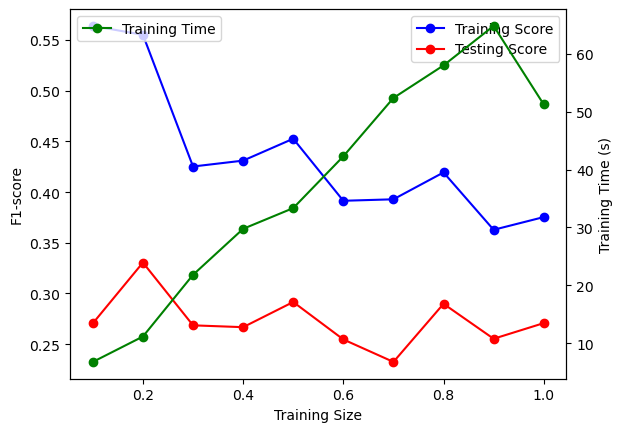

In [50]:
import time
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define a list of training sizes to use for the learning curve
train_sizes = np.linspace(0.1, 1.0, num=10)

# Initialize lists to store the error rates and training times/iterations for each training size
train_error = []
test_error = []
train_time = []

# Train the XGBoost classifier for each training size
for size in train_sizes:
    # Determine the number of samples to use for training
    n_train = int(size * len(X_train_trans))
    # Select a random subset of the training data
    idx = np.random.choice(len(X_train_trans), n_train, replace=False)
    X_train_subset = X_train_trans[idx]
    y_train_subset = np.array(y_train)[idx]

    # Train the XGBoost classifier and record the training time
    start_time = time.time()
    clf = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, random_state=42)
    clf.fit(X_train_subset, y_train_subset)
    end_time = time.time()
    train_time.append(end_time - start_time)

    y_train_pred = clf.predict(X_train_subset)
    y_test_pred = clf.predict(X_test_trans)
    f1 = f1_score(y_train_subset, y_train_pred)
    train_error.append(f1)
    f1 = f1_score(y_test, y_test_pred)
    test_error.append(f1)

# Plot the learning curve and training time/iteration curve
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(train_sizes, train_error, 'bo-', label='Training Score')
ax1.plot(train_sizes, test_error, 'ro-', label='Testing Score')
ax1.set_xlabel('Training Size')
ax1.set_ylabel('F1-score')
ax1.legend(loc='upper right')

ax2.plot(train_sizes, train_time, 'go-', label='Training Time')
ax2.set_ylabel('Training Time (s)')
ax2.legend(loc='upper left')

plt.show()

In [146]:
print(classification_report(y_train, clf.predict(X_train_trans),
                            target_names=["no", "yes"]))

              precision    recall  f1-score   support

          no       0.89      0.98      0.93     19795
         yes       0.69      0.27      0.39      3385

    accuracy                           0.88     23180
   macro avg       0.79      0.62      0.66     23180
weighted avg       0.86      0.88      0.85     23180



In [37]:
from sklearn.neural_network import MLPClassifier




# create an instance of MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=1000, random_state=42)

# train the model on the training data
clf_mlp.fit(X_train, y_train)


pred_mlp = clf_mlp.predict(X_test)
cm_mlp = confusion_matrix(y_test, pred_mlp, labels=[0, 1])

print("Confusion matrix:\n{}\n".format(cm_mlp))

print(classification_report(y_test, pred_mlp,
                            target_names=["genuine", "fraudulent"]))
# evaluate the model on the testing data
score = clf_mlp.score(X_test, y_test)
# print(f'Test accuracy: {score}')

Confusion matrix:
[[6369  230]
 [ 820  308]]

              precision    recall  f1-score   support

     genuine       0.89      0.97      0.92      6599
  fraudulent       0.57      0.27      0.37      1128

    accuracy                           0.86      7727
   macro avg       0.73      0.62      0.65      7727
weighted avg       0.84      0.86      0.84      7727

